# Reddit Text Mining: r/unixporn vs r/windows

### Prerequisites
* selenium
* one of the following (depending on which browser you're using)
  * firefox: [geckodriver](https://github.com/mozilla/geckodriver/releases/)
  * chrome/chromium: [chromedriver](http://chromedriver.chromium.org/)
  
### Useful Tutorials
* https://huilansame.github.io/huilansame.github.io/archivers/sleep-implicitlywait-wait
* https://wangxin1248.github.io/python/2018/09/python3-spider-8.html

### 1. Scraping a single page
Use `scrape_job()` provided below on single job with its url.

Example target: **[\[Wmderland\] my own tiling window manager](https://www.reddit.com/r/unixporn/comments/a37ing/wmderland_my_own_tiling_window_manager/)**

In [2]:
from selenium.webdriver import Firefox
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
from selenium.common.exceptions import TimeoutException
import selenium.webdriver.support.ui as ui

import time
import csv

In [2]:
class RedditPost:
    def __init__(self, post_class, title, comments):
        self.post_class = post_class
        self.title = title
        self.comments = comments
    
    def __str__(self):
        return self.comments

In [3]:
def scrape_post(wait, url, post_class, retry=3, timeout=10):
    """ Scrape the job info from the specified Url. A broswer driver MUST be initialized beforehand.
    :param wait: contains wait timeout.
    :param url: the url of a reddit post.
    :param retry: times to retry.
    :return: an instance of RedditPost.
    """
    for i in range(0, retry):
        driver.get(url)
    
        # Wait until all required dynamics elements are generated.
        try:
            wait.until(ec.presence_of_element_located((By.CLASS_NAME, post_title_class_name)))
            wait.until(ec.presence_of_element_located((By.CLASS_NAME, comment_box_class_name)))

            # Extract post title and all comments.
            title = driver.find_element_by_class_name(post_title_class_name).text
            comments = driver.find_elements_by_class_name(comment_box_class_name)
            return RedditPost(post_class, title, ' '.join([comment.text.replace('\n', ' ') for comment in comments]))
        
        except TimeoutException:
            return None
        except Exception as e:
            print(e)
            continue
    
    # If all retries have failed, return None.
    return None

In [4]:
# Reddit HTML element constants.
post_title_class_name = r'jPVHmE'
comment_box_class_name = r'_3cjCphgls6DH-irkVaA0GM'

In [5]:
options = Options()
options.add_argument('-headless')
driver = Firefox(executable_path='/opt/firefox/geckodriver', options=options)
wait = WebDriverWait(driver, timeout=10)

post_url = r'https://www.reddit.com/r/unixporn/comments/a37ing/wmderland_my_own_tiling_window_manager/'
post = scrape_post(wait, post_url, 'unixporn', timeout=10)

if post is not None:
    print(post)

driver.quit()

Hello everyone! I recently wrote a wm and want to share it with you. I started this project because I thought it would be fun to learn Xlib, C++ and how X11 works. I know there's already plenty of wm's out there and we don't need another one, but I wrote this simply for my personal use and study, so if any people ended up using it that's just a bonus! And I hope my WM will help anyone who wants to learn Xlib as well. Features: Tiling (Horizontally and Vertically), Floating. Mod4 + o to toggle. 9 Workspaces. (move application to workspace: alt + {1-9}, goto workspace: Mod4 + {1-9}) Border and gaps. A simple config system: set border colors (focused/unfocused), border width, gap width ... etc. assign application to a specific workspace enable floating for specified applications execute applications on wm startup. Links: Wmderland dots wall Additionally, I'm using displayctl to set wallpaper and resolution on startup. All I have to do is to put exec displayctl in my wm config. How is mult

---

## 2. Scrape a subreddit
Use `scrape_subreddit(driver, subreddit_name, retry=3, timeout=10)` provided below.

Example: scrape 10 posts under r/unixporn.

In [6]:
def scrape_subreddit(driver, subreddit_name, retry=3, timeout=10):
    """ Scrape info of all jobs related to the specified keyword
    :param keyword: google job search keyword.
    :param wait: contains timeout.
    :param urls: urls cache.
    :param start: the number of the record to start scraping.
    """
    wait = WebDriverWait(driver, timeout=timeout)
    
    # Open the subreddit
    driver.get(r'https://www.reddit.com/r/{}/'.format(subreddit_name));
    time.sleep(2)
    
    wait.until(ec.presence_of_element_located((By.CLASS_NAME, post_title_link_class_name)))
    urls = [title.get_attribute('href') for title in driver.find_elements_by_class_name(post_title_link_class_name)]
    
    return [scrape_post(wait, url, subreddit_name) for url in urls[1:]]

In [7]:
# Subreddit HTML element constants.
post_title_link_class_name = r'SQnoC3ObvgnGjWt90zD9Z'

In [8]:
options = Options()
options.add_argument('-headless')
driver = Firefox(executable_path='/opt/firefox/geckodriver', options=options)

unixporn_posts = scrape_subreddit(driver, 'unixporn')
windows_posts = scrape_subreddit(driver, 'windows')
print('done')

driver.quit()

done


In [10]:
unixporn_posts[0].title

'[KDE] Just some fresh air'

In [12]:
with open('reddit_posts.csv', 'w') as f:
    w = csv.DictWriter(f, fieldnames = ['post_class', 'title', 'comments'])
    w.writeheader()
    
    for post in unixporn_posts + windows_posts:
        if post is not None:
            w.writerow(vars(post))

---

## 2. Text Mining with Apriori

In [2]:
import re
import nltk
import pandas

data = pandas.read_csv('reddit_posts.csv')
data

,post_class,title,comments
0,unixporn,[KDE] Just some fresh air,DE: KDE Kvantum theme: Monochrome KDE Wallpape...
1,unixporn,[i3-gaps] Neon Pyramids,The first neon wallpaper I like. The soft grai...
2,unixporn,[awesome] (´｡• ᵕ •｡`) ♡,That looks super clean wallpaper awesome confi...
3,unixporn,[2bwm] The Quick Brown Desktop,"i like it! Kudos for ya! Thanks! Great setup, ..."
4,unixporn,[i3] Colors!,I dig it. Uovote for lack of shitty anime back...
5,unixporn,[Awesome] Yet another pixelized theme,Praise the suuuuuuuuun DE : gnome WM : awesome...
6,unixporn,[i3-gaps] My current rice,Did you know that you can also rice your pdf v...
7,unixporn,[Plasma] K/DE Cyberpunk Neon,Got inspired from u/Roboron3042 's awesome con...
8,unixporn,[TTY] Did you know you can customize the TTY l...,Did you know that you can play videos using VL...
9,unixporn,[BSPWM] My first rice on Arch,"What system monitor is that? I can be wrong, b..."


In [3]:
def tokenize(tokenizer: nltk.tokenize.MWETokenizer, s: str, lowercase=True, preserve_case_words=[]):
    """ Tokenize given string using nltk MWETokenizer.
    :param case: convert all tokens into lowercase.
    :param exclude_words: words that should preserve their cases.
    :return: a list of tokens.
    """
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = tokenizer.tokenize(tokens)
    
    # Remove tokens that are either purely digits or purely punctuations.
    tokens = list(filter(lambda token: not token.isdigit() and re.search('[a-zA-Z]', token), tokens))

    # Since nltk MWETokenizer will not split tokens that contain a slash,
    # we'll have to do it ourselves.
    for token in tokens:
        if '/' in token:
            tokens += token.split('/')
            tokens.remove(token)
            
    # Lowercase conversion.
    tokens = [token.lower() if token not in preserve_case_words else token for token in tokens ]
            
    return tokens

In [4]:
# Text cleanup and create corpus.
tokenizer = nltk.tokenize.MWETokenizer(separator='_')

corpus = data['comments'].apply(lambda comment: ' '.join(tokenize(tokenizer, comment))).tolist()

In [5]:
# TF-IDF
# coding:utf-8  
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [6]:
len(corpus)
features = tfidf.toarray()
labels = data['title'].values
labels

array(['[KDE] Just some fresh air', '[i3-gaps] Neon Pyramids',
       '[awesome] (´｡• ᵕ •｡`) ♡', '[2bwm] The Quick Brown Desktop',
       '[i3] Colors!', '[Awesome] Yet another pixelized theme',
       '[i3-gaps] My current rice', '[Plasma] K/DE Cyberpunk Neon',
       '[TTY] Did you know you can customize the TTY login screen?',
       '[BSPWM] My first rice on Arch', '[i3-gaps] Pretty rice',
       '[Cinnamon] Moving back to Mint on new hardware!',
       '[i3-gaps] Blurred my previous setup',
       '[Aqua] Just learned about screens', '[BSPWM] Brazilian Rice',
       '[GNOME] Got to finally install linux natively',
       '[DDE] Manjaro Deepin Rice', '[PSP] btw i use uClinux on PSP',
       "[i3wm] Just How I Like It...CLI 'N FUNctional", 'CyberPunk [i3]',
       '[Plasma] Finally had the time and brain capacity to customize plasma to my needs.',
       '[i3-gaps] All the cliches in one but I still love it.',
       '[i3-gaps] Not usefull at all', '[i3] nogaps',
       '[Gnome] My 

In [7]:
# PCA
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
data['pca1'] = pandas.DataFrame(transData[:,0])
data['pca2'] = pandas.DataFrame(transData[:,1])
data.head()

,post_class,title,comments,pca1,pca2
0,unixporn,[KDE] Just some fresh air,DE: KDE Kvantum theme: Monochrome KDE Wallpape...,0.161033,-0.187150
1,unixporn,[i3-gaps] Neon Pyramids,The first neon wallpaper I like. The soft grai...,0.084854,-0.315940
2,unixporn,[awesome] (´｡• ᵕ •｡`) ♡,That looks super clean wallpaper awesome confi...,-0.010368,-0.103413
3,unixporn,[2bwm] The Quick Brown Desktop,"i like it! Kudos for ya! Thanks! Great setup, ...",-0.319664,-0.322195
4,unixporn,[i3] Colors!,I dig it. Uovote for lack of shitty anime back...,0.196054,-0.295300


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(x_vars=['pca1'], y_vars=['pca2'], data=data, hue="post_class", size=5)

/home/aesophor/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


In [9]:
textFrame = pandas.DataFrame(features, columns=word)
textFrame.head()
len(features)

39

In [10]:
allF = features.flatten()
nonZero = allF[np.nonzero(allF)]
m = np.median(nonZero)

In [11]:
allF[np.nonzero(allF)]

array([0.03896797, 0.0433688 , 0.03896797, ..., 0.07542784, 0.19773002,
       0.03664891])

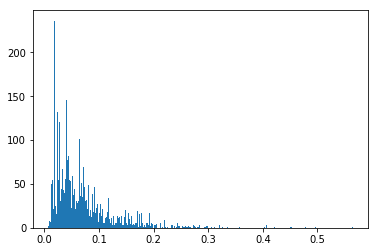

0.054821622193549926

In [12]:
plt.hist(nonZero, bins=500)
plt.show()
m

In [13]:
m = 0.1
dataset = list()
for i in range(len(features)):
    temp = textFrame.columns.values[[textFrame.iloc[i] >= m]]
    dataset.append(temp.tolist())

/home/aesophor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


In [14]:
for i in range(len(features)):
    print(dataset[i])

['are', 'beautiful', 'but', 'dock', 'dolphin', 'icon', 'icons', 'it', 'kde', 'kvantum', 'like', 'looks', 'love', 'plasma', 'that', 'the', 'them', 'theme', 'they', 'to', 'you', 'your']
['album', 'beautiful', 'but', 'clock', 'color', 'compton', 'config', 'editor', 'fancy', 'fedora', 'focus', 'in', 'it', 'markdown', 'me', 'my', 'neon', 'on', 'pants', 'point', 'polybar', 'post', 'saw', 'set', 'that', 'the', 'to', 'transparency', 'use', 'was', 'when']
['awesome', 'clean', 'compared', 'config', 'configure', 'configured', 'drawings', 'dsl', 'ducking', 'dwm', 'expressive', 'hard', 'his', 'ilya', 'into', 'is', 'kakeregui', 'kuvshinov', 'language', 'like', 'looks', 'love', 'lua', 'other', 'perfect', 'programming', 'startify', 'style', 'super', 'vim', 'wallpaper', 'with', 'wm', 'wms', 'xmonad', 'you']
['2bwm', 'and', 'awesome', 'better', 'brown', 'clock', 'details', 'editor', 'font', 'fonts', 'for', 'found', 'glad', 'great', 'hack', 'haha', 'integration', 'it', 'kudos', 'liked', 'manager', 'neovi

In [15]:
# Apriori: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pandas.DataFrame(te_ary, columns=te.columns_)
graph = df.T
graph.columns = df['title']

In [16]:
graph.head()

title,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0x0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2bwm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
from mlxtend.frequent_patterns import apriori

minsup = 0.01
apriori(graph, min_support=minsup, use_colnames=True)

,support,itemsets
0,0.033083,(False)
1,0.046617,(False)
2,0.054135,(False)
3,0.057143,(True)
4,0.037594,(False)
5,0.043609,(False)
6,0.046617,(False)
7,0.034586,(False)
8,0.019549,(False)
9,0.067669,(False)


In [18]:
result = apriori(graph, min_support=minsup)
result

,support,itemsets
0,0.033083,(0)
1,0.046617,(1)
2,0.054135,(2)
3,0.057143,(3)
4,0.037594,(4)
5,0.043609,(5)
6,0.046617,(6)
7,0.034586,(7)
8,0.019549,(8)
9,0.067669,(9)


In [19]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

rules = association_rules(result, metric="confidence", min_threshold=0.7)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [20]:
rules = association_rules(result, metric="lift", min_threshold=1.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(16),(1),0.022556,0.046617,0.010526,0.466667,10.010753,0.009475,1.787594
1,(1),(16),0.046617,0.022556,0.010526,0.225806,10.010753,0.009475,1.262531
2,(3),(23),0.057143,0.033083,0.010526,0.184211,5.568182,0.008636,1.185253
3,(23),(3),0.033083,0.057143,0.010526,0.318182,5.568182,0.008636,1.382857
4,(16),(4),0.022556,0.037594,0.013534,0.600000,15.960000,0.012686,2.406015


In [21]:
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,(16),(1),0.022556,0.046617,0.010526,0.466667,10.010753,0.009475,1.787594,1
1,(1),(16),0.046617,0.022556,0.010526,0.225806,10.010753,0.009475,1.262531,1
2,(3),(23),0.057143,0.033083,0.010526,0.184211,5.568182,0.008636,1.185253,1
3,(23),(3),0.033083,0.057143,0.010526,0.318182,5.568182,0.008636,1.382857,1
4,(16),(4),0.022556,0.037594,0.013534,0.600000,15.960000,0.012686,2.406015,1


In [22]:
out = rules[ (rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]
out.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len


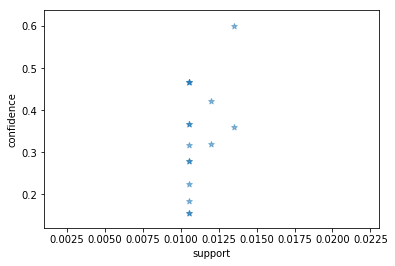

In [23]:
support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [24]:
len(rules)
rules['antecedents'].head()

0    (16)
1     (1)
2     (3)
3    (23)
4    (16)
Name: antecedents, dtype: object

In [25]:
import networkx as nx
G = nx.DiGraph()
for i in range(len(df)):
    G.add_node(i)
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])

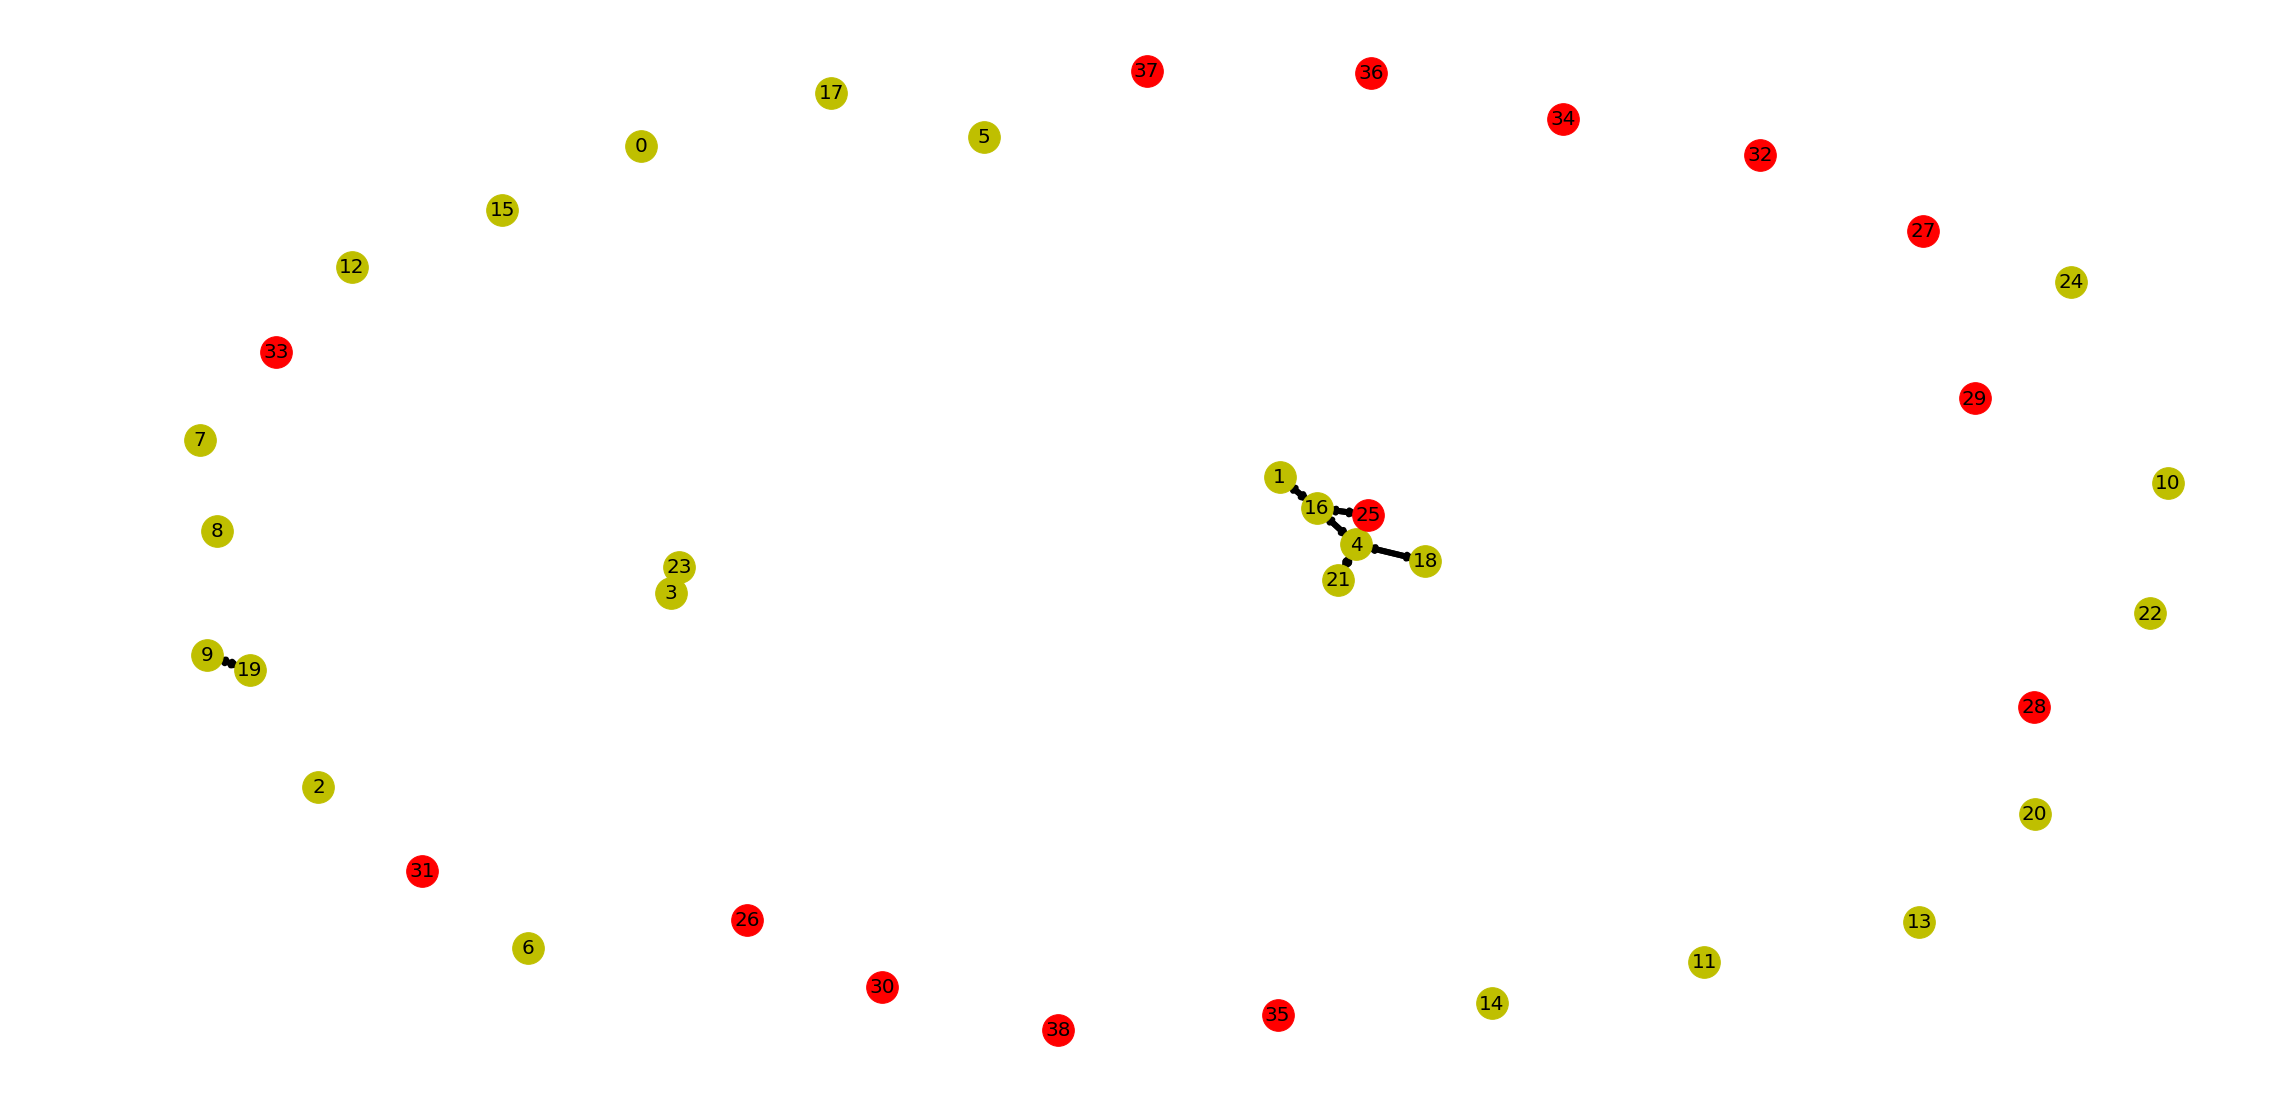

In [26]:
nodeListA = df.index[data['post_class'] == 'unixporn'].tolist()
nodeListB = df.index[data['post_class'] == 'windows'].tolist()

plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, nodelist=nodeListA, node_color="y", node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=nodeListB, node_color="r", node_size=1000)
nx.draw_networkx_edges(G, pos, width=6)

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [27]:
# 獨立議題，和其他社團無關聯
print(list(nx.isolates(G)))

[0, 2, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 17, 20, 22, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


In [28]:
# 小群體
from networkx.algorithms.approximation import dominating_set
dominating_set.min_edge_dominating_set(G)

{(1, 16), (3, 23), (4, 18), (9, 19)}

In [35]:
pandas.DataFrame(data['title'])

,title
0,[KDE] Just some fresh air
1,[i3-gaps] Neon Pyramids
2,[awesome] (´｡• ᵕ •｡`) ♡
3,[2bwm] The Quick Brown Desktop
4,[i3] Colors!
5,[Awesome] Yet another pixelized theme
6,[i3-gaps] My current rice
7,[Plasma] K/DE Cyberpunk Neon
8,[TTY] Did you know you can customize the TTY l...
9,[BSPWM] My first rice on Arch


## Conclusion
The above analysis indicates the following posts are related to one another:
* (1) unixporn - [\[i3-gaps\] Neon Pyramids](https://www.reddit.com/r/unixporn/comments/ajn1mp/i3gaps_neon_pyramids/)
* (4) unixporn - [\[i3\] Colors!](https://www.reddit.com/r/unixporn/comments/ajb3m4/i3_colors/)
* (16) unixporn - [\[DDE\] Manjaro Deepin Rice](https://www.reddit.com/r/unixporn/comments/aja5w5/dde_manjaro_deepin_rice/)
* (18) unixporn - [\[i3wm\] Just How I Like It...CLI 'N FUNctional](https://www.reddit.com/r/unixporn/comments/aje9wl/i3wm_just_how_i_like_itcli_n_functional/)
* (21) unixporn - [\[i3-gaps\] All the cliches in one but I still love it.](https://www.reddit.com/r/unixporn/comments/ajb4dd/i3gaps_all_the_cliches_in_one_but_i_still_love_it/)


* (25) windows - [I won’t show password page on welcome screen. Can’t boot into safe mode because no power button welcome page](https://www.reddit.com/r/windows/comments/ajkyg0/i_wont_show_password_page_on_welcome_screen_cant/)

### Most posts are from r/unixporn, but why is there a post from r/windows?

Post 16 is highly related to post 25.

In post 16, a comment said:

> I download manjaro xfce cant go to lock screen, reboot, shutdown doesmt work
> 
> if there r no windows open then the screen goes black but pc is on
> 
> dockbarx doesn't work properly:/ once it crashed on update and i had to install again from usb
> 
> all the distros i used had some kind of serious problems that made it unusable
> 
> linux mint was workin fine, i installed latte-dock (install.sh from source) and it crashed whole ui, wierd white bars appeard, wierd pixelated dock and most importantly it never got uninstalled properly (doesnt show up in application menu but always ran on startup)
> 
> nobody ever helped me on forums and on subreddits :(
> 
> always i write these expecting some help as i am bored of windows

In post 25, OP stated that he couldn't login because the password prompt won't show up. Most comments were telling OP to `reboot` into `windows` `safemode`, ...etc.

Post 1, 4, 16, 18, 21 are highly related to one another since they are talking about the same `X11 Window Manager`, i3wm. Several other posts like 19, 22, 23 did not get involved because they lacked comments.